<a href="https://colab.research.google.com/github/SachinScaler/UnsupervisedML_Feb24/blob/main/ML_Intro_to_Unsupervised_Learning%2C_KMeans_Revisited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W" -O E-commerce.csv

--2024-02-22 16:08:00--  https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W
Resolving drive.google.com (drive.google.com)... 209.85.146.139, 209.85.146.113, 209.85.146.138, ...
Connecting to drive.google.com (drive.google.com)|209.85.146.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W&export=download [following]
--2024-02-22 16:08:01--  https://drive.usercontent.google.com/download?id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.198.132, 2607:f8b0:4001:c1c::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.198.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139827 (137K) [application/octet-stream]
Saving to: ‘E-commerce.csv’

E-commerce.csv      100%[===================>] 136.55K  --.-KB/

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('./E-commerce.csv')
df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


In [ ]:
df.shape

(2500, 7)

### LLOYD's Algo: Scratch Implementation

Let's create an aritificial dataset

In [ ]:
data_size = 1000
num_iters = 5
num_clusters = 4

from sklearn.datasets import make_blobs

# 2-Dim Data
data, y = make_blobs(n_samples=2000, centers=4, n_features=2,random_state=0)

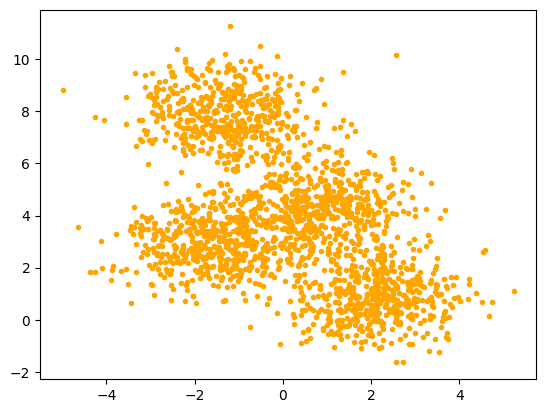

In [ ]:
# plot the datapoints
plt.scatter(data[:, 0], data[:, 1], marker = '.',
                color = 'orange', label = 'data points')


In [ ]:
import matplotlib.pyplot as plt

# function to plot data as cluster and centroids
def plot(data, centroids):
    plt.scatter(data[:, 0], data[:, 1], marker = '.',
                color = 'gray', label = 'data points')
    plt.scatter(centroids[:, 0], centroids[:, 1],
                color = 'red', label = 'centroid')
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()

In [ ]:
import numpy as np
# Initialise centroids

n_clusters = 4
centroids = data[np.random.choice(range(data.shape[0]), size = (n_clusters, ))]

# Create a list to store which centroid is assigned to each dataset
assigned_centroids = np.zeros(len(data), dtype = np.int32)

def compute_l2_distance(x, centroids):
    dist = np.array([]).reshape(len(x),0)
    for centroid in (centroids):
      # Compute the difference, following by raising to power 2 and summing
      new_dist = np.sqrt(((x - centroid) ** 2).sum(axis = 1)).reshape(-1,1)
      dist = np.hstack([dist,new_dist])
    return dist


# find the closest centroid
def get_closest_centroid(x, centroids):

    # Loop over each centroid and compute the distance from data point.
    dist = compute_l2_distance(x, centroids)

    # Get the index of the centroid with the smallest distance to the data point
    closest_centroid_index =  np.argmin(dist, axis = 1)

    return closest_centroid_index


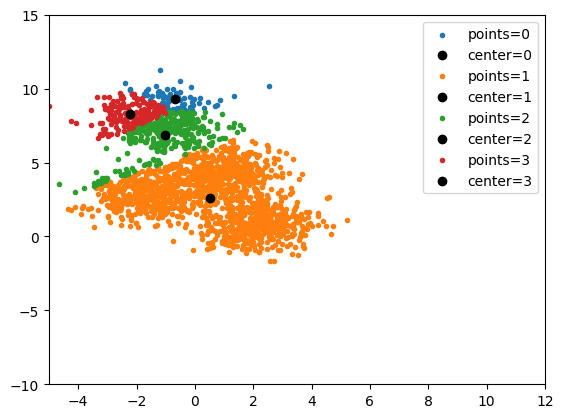

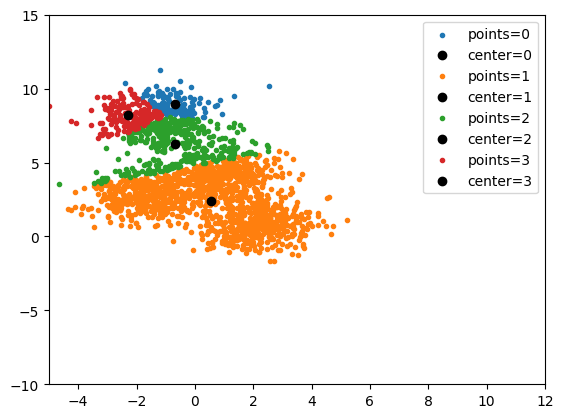

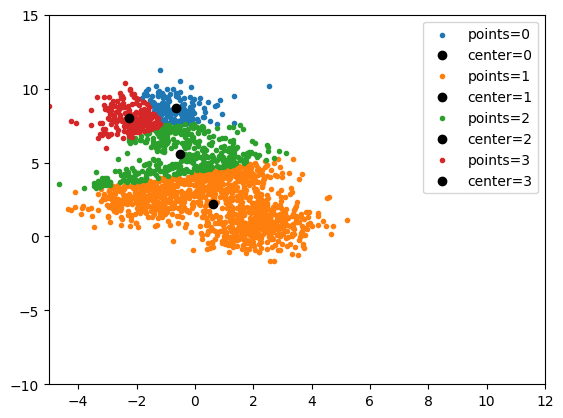

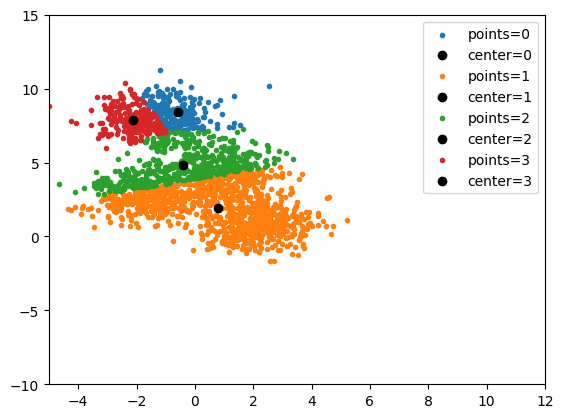

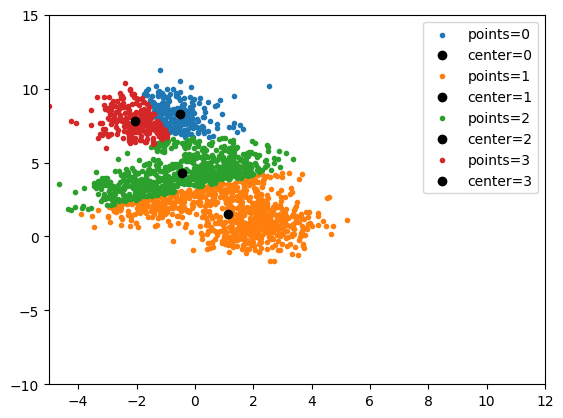

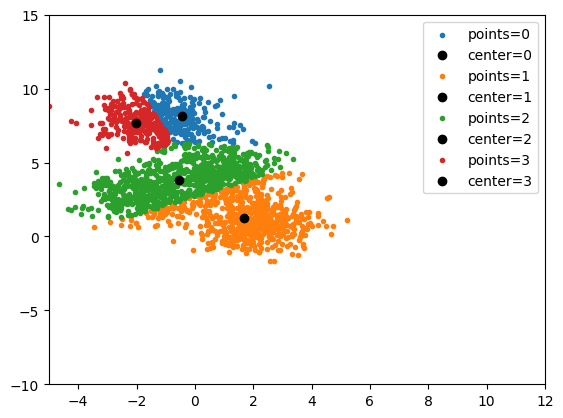

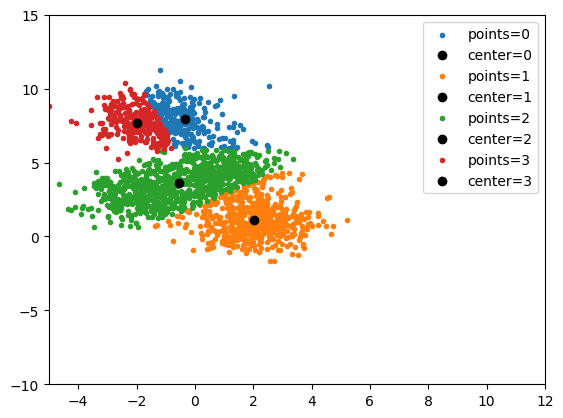

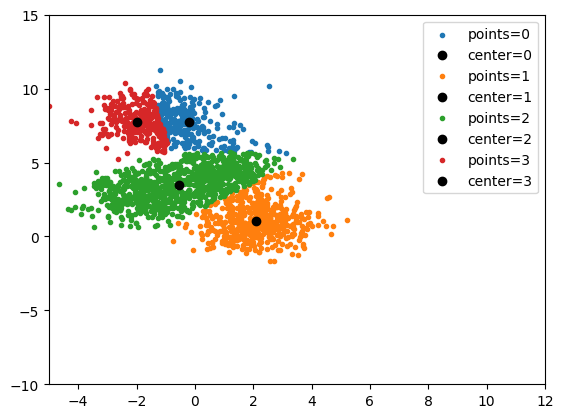

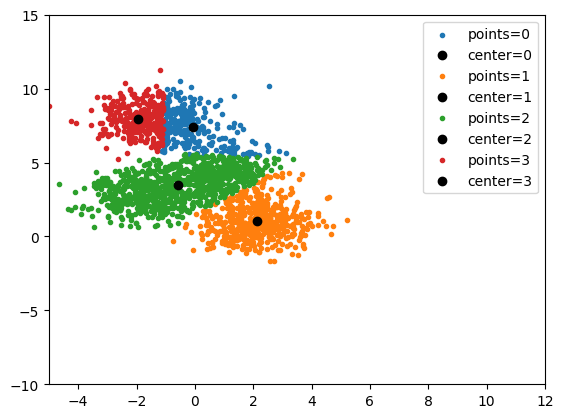

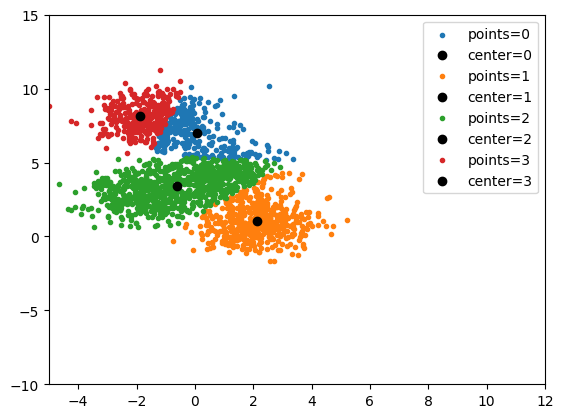

In [ ]:
# Loop for num_iters iterations
num_iters = 10
for n in range(num_iters):
    # Get the closest centroid
    closest_centroid = get_closest_centroid(data, centroids)

    # Assign the centroid to the data point.
    assigned_centroids = closest_centroid

    # Loop over centroids and compute the new ones.
    for c in range(len(centroids)):
        # Get all the data points belonging to a particular cluster
        cluster_data = data[assigned_centroids == c]

        # Compute the average of cluster members to compute new centroid
        new_centroid = cluster_data.mean(axis = 0)

        # assign the new centroid
        centroids[c] = new_centroid

        # plot(data, centroids)
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], marker = '.', label = f'points={c}')
        plt.scatter(centroids[c][0], centroids[c][1], color = 'black', label = f'center={c}')
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()


### HW: modify the above code to Plot 3 Clusters

SKLearn Implementation:

In [ ]:
from sklearn.cluster import KMeans

k = 4 ## arbitrary value
kmeans = KMeans(n_clusters=k,random_state = 42)
y_pred = kmeans.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_pred

array([1, 3, 2, ..., 3, 1, 3], dtype=int32)

In [ ]:
set(y_pred)

{0, 1, 2, 3}

In [ ]:
kmeans.inertia_ # WHAT IS INERTIA: WCSS

3489.5482248084563

In [ ]:
##coordinates of the cluster centers
kmeans.cluster_centers_

array([[-1.31545241,  7.88062587],
       [-1.65865258,  2.90087149],
       [ 2.09475247,  0.85943059],
       [ 0.94233337,  4.32064848]])

### Elbow Method:

In [ ]:
# Inertia = Within Cluster Sum of Squares
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(data)
                for k in range(1, 10+1)]

kmeans_per_k

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[KMeans(n_clusters=1, random_state=42),
 KMeans(n_clusters=2, random_state=42),
 KMeans(n_clusters=3, random_state=42),
 KMeans(n_clusters=4, random_state=42),
 KMeans(n_clusters=5, random_state=42),
 KMeans(n_clusters=6, random_state=42),
 KMeans(n_clusters=7, random_state=42),
 KMeans(random_state=42),
 KMeans(n_clusters=9, random_state=42)]

In [ ]:
inertias = [model.inertia_ for model in kmeans_per_k]

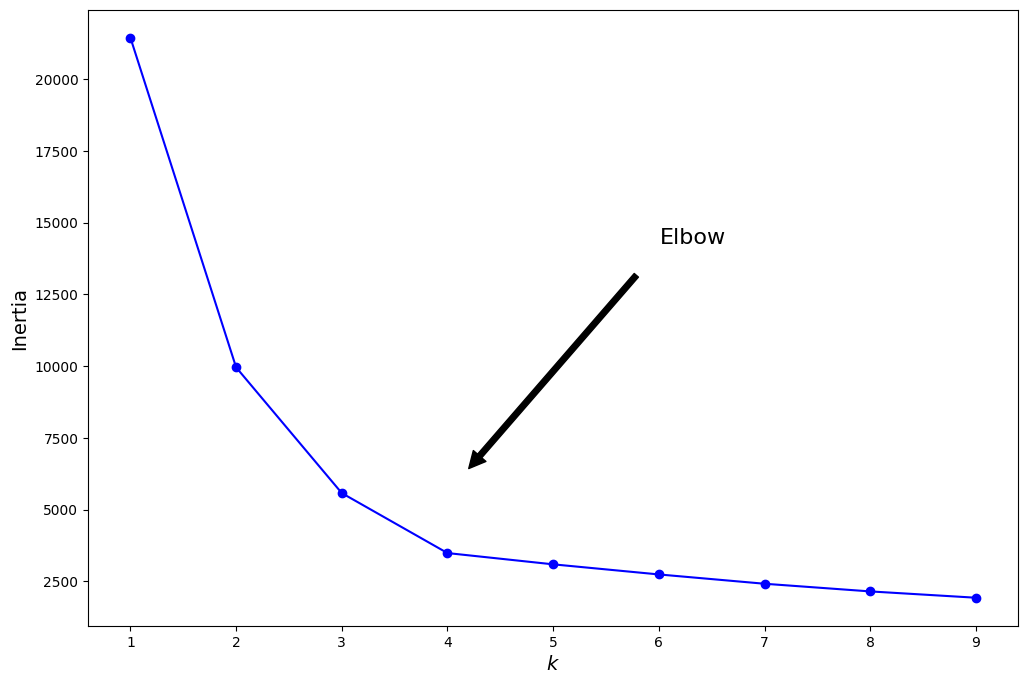

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

### Case Study: Customer Segementation


In [ ]:
df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


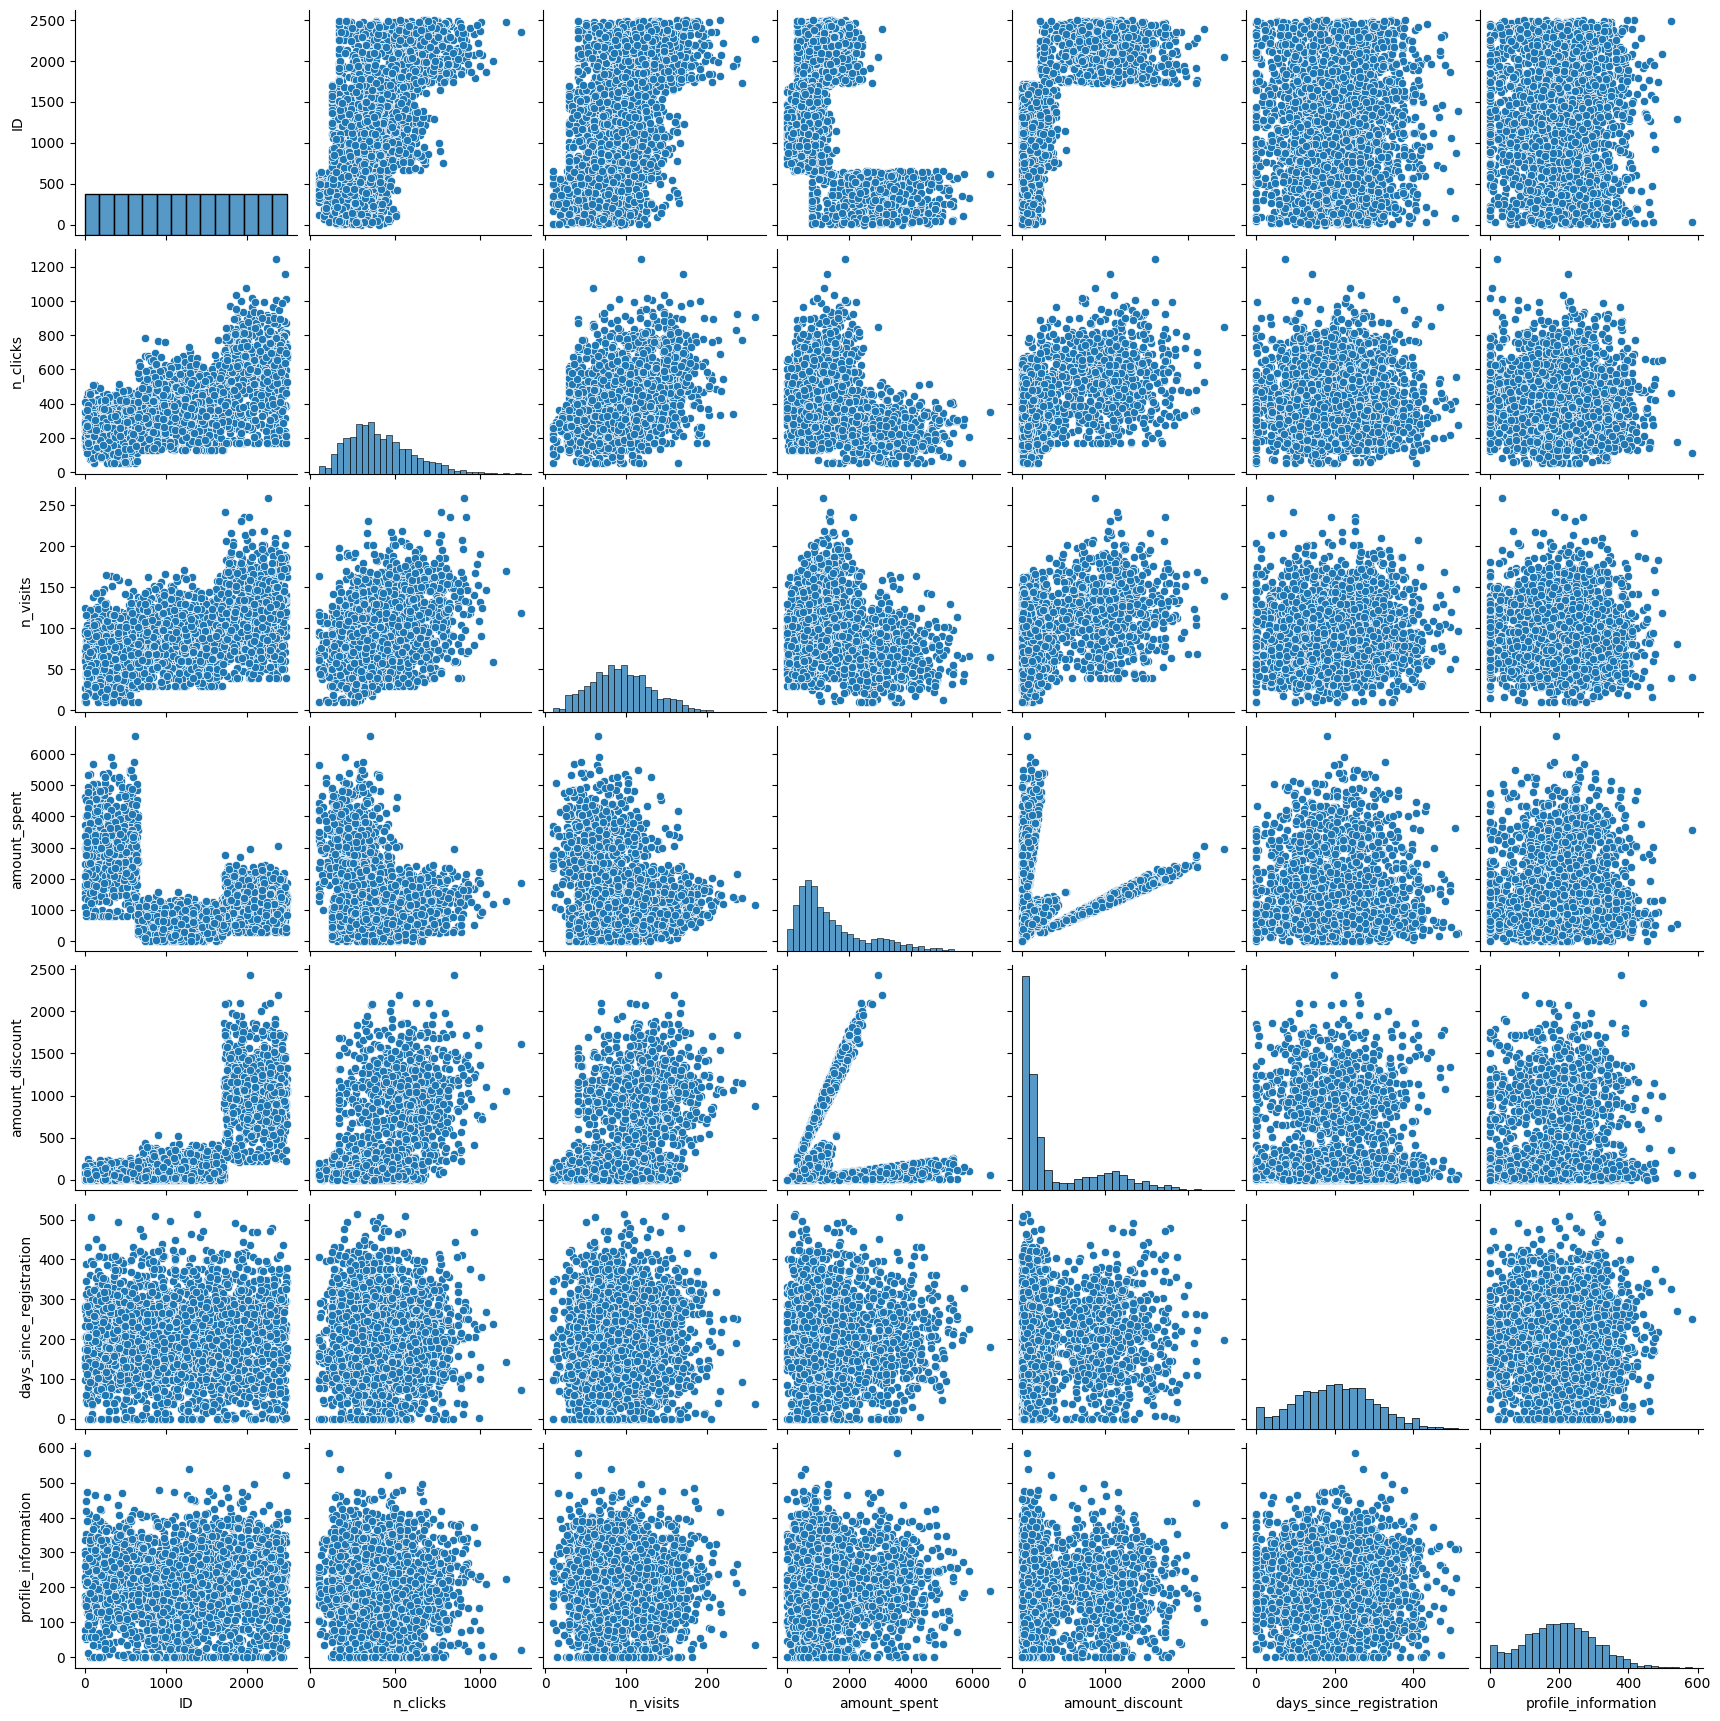

In [ ]:
sns.pairplot(df)

From pairplot, we can see:

- With multiple variables(dimensions), it is easier to identify patterns or if some data points are closer together forming cluster, using pairplot.

- Points that are closer together should have similar behaviour or characteristics.

#### **What could be the benefits of identifying patterns and groups in this data?**

If we can clearly distinguish these groups (segregate customers), the Amazon can:

- offer/show more discounted items to people who always buy discounted items

- show quality products to people who buy expensive products or buy more often,

- identify segment of customer who explore a lot but don't end up buying

###Question:
```
From the above two subplots in which subplot clusters are visible?

a. Amount spent and n_clicks
b. Amount discount and n_visits
c. None of them
```

In [ ]:
df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


In [ ]:
# let's drop ID and keep remaining features for clustering
X=df.drop("ID",axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2500 non-null   int64  
 1   n_clicks                 2500 non-null   int64  
 2   n_visits                 2500 non-null   int64  
 3   amount_spent             2500 non-null   float64
 4   amount_discount          2500 non-null   float64
 5   days_since_registration  2500 non-null   int64  
 6   profile_information      2500 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 136.8 KB


### **Cleaning + Preprocessing**

**Some things to note about this data**

- CustomerID is just an identifier of the customer - its not a required parameter.
- No categorical variable, but we would have discarded that as well.
- No missing values.

In [ ]:
X.describe()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,408.68000,94.475600,1445.090745,388.508637,200.973600,201.040400
std,186.41409,38.866356,1167.663473,487.143968,99.136618,100.139213
min,50.00000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,274.75000,67.000000,609.618538,56.298615,130.000000,132.000000
50%,378.00000,92.000000,1036.189112,137.454623,200.000000,201.000000
75%,522.00000,119.000000,1949.270949,679.540536,268.000000,270.000000
max,1246.00000,259.000000,6567.402267,2428.406527,514.000000,585.000000


### Feature Scaling
**Can you observe something about the ranges of the features?**

- Features are on different scales.

**Should we or should we not we scale the variables for K-means?**

- K-Means is a distance-based algorithm. Because of that, it’s really important to perform feature scaling (normalize, standardize, or choose any other option in which the distance has some comparable meaning for all the columns).

- For our use case, we can use MinMaxScaler instead of StandardScaler,  transforming the feature values to fall within the bounded intervals (min and max), rather than making them to fall around mean as 0 with standard deviation as 1 (StandardScaler).

- MinMaxScaler is an excellent tool for this purpose. MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. This scaling compresses all the inliers in the narrow range [0, 0.005].

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

### HW: Find optimal number of clusters and fit KMean to cluster this data
